In [14]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [16]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [17]:
from citipy import citipy

In [18]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [19]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [20]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [21]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fd6a8a81f251066c6dc4a149fd6e734b


In [22]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fd6a8a81f251066c6dc4a149fd6e734b


In [26]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [27]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [28]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | nabire
Processing Record 2 of Set 13 | east london
Processing Record 3 of Set 13 | busselton
Processing Record 4 of Set 13 | esperance
Processing Record 5 of Set 13 | mataura
Processing Record 6 of Set 13 | coos bay
Processing Record 7 of Set 13 | cedeno
Processing Record 8 of Set 13 | pevek
Processing Record 9 of Set 13 | maunabo
Processing Record 10 of Set 13 | butaritari
Processing Record 11 of Set 13 | camana
Processing Record 12 of Set 13 | torbay
Processing Record 13 of Set 13 | port alfred
Processing Record 14 of Set 13 | tshela
Processing Record 15 of Set 13 | pahrump
Processing Record 16 of Set 13 | vaini
Processing Record 17 of Set 13 | khatanga
Processing Record 18 of Set 13 | avarua
Processing Record 19 of Set 13 | north bend
Processing Record 20 of Set 13 | sistranda
Processing Record 21 of Set 13 | gelibolu
Processing Record 22 of Set 13 | hermanus
Processing Record 23 of Set 13 | saint-philippe
Processing Record 24 of Set 13 | jujuy
City n

Processing Record 34 of Set 16 | severo-kurilsk
Processing Record 35 of Set 16 | mount isa
Processing Record 36 of Set 16 | bluff
Processing Record 37 of Set 16 | hithadhoo
Processing Record 38 of Set 16 | klaebu
Processing Record 39 of Set 16 | kropotkin
Processing Record 40 of Set 16 | saldanha
Processing Record 41 of Set 16 | bud
Processing Record 42 of Set 16 | auki
Processing Record 43 of Set 16 | umzimvubu
City not found. Skipping...
Processing Record 44 of Set 16 | arraial do cabo
Processing Record 45 of Set 16 | rockport
Processing Record 46 of Set 16 | parksville
Processing Record 47 of Set 16 | haverhill
Processing Record 48 of Set 16 | pangnirtung
Processing Record 49 of Set 16 | cifuentes
Processing Record 50 of Set 16 | jumla
Processing Record 1 of Set 17 | paravakar
City not found. Skipping...
Processing Record 2 of Set 17 | sentyabrskiy
City not found. Skipping...
Processing Record 3 of Set 17 | tawnat
City not found. Skipping...
Processing Record 4 of Set 17 | bucksport

Processing Record 19 of Set 20 | tateyama
Processing Record 20 of Set 20 | lorengau
Processing Record 21 of Set 20 | saint-pierre
Processing Record 22 of Set 20 | cockburn town
Processing Record 23 of Set 20 | baindur
Processing Record 24 of Set 20 | polunochnoye
Processing Record 25 of Set 20 | hofn
Processing Record 26 of Set 20 | warqla
City not found. Skipping...
Processing Record 27 of Set 20 | belmonte
Processing Record 28 of Set 20 | saskylakh
Processing Record 29 of Set 20 | ariquemes
Processing Record 30 of Set 20 | yar-sale
Processing Record 31 of Set 20 | mtsensk
Processing Record 32 of Set 20 | presidente franco
Processing Record 33 of Set 20 | ambon
Processing Record 34 of Set 20 | atagay
Processing Record 35 of Set 20 | abu samrah
Processing Record 36 of Set 20 | asau
Processing Record 37 of Set 20 | port hardy
Processing Record 38 of Set 20 | nago
Processing Record 39 of Set 20 | grand river south east
City not found. Skipping...
Processing Record 40 of Set 20 | sawakin


Processing Record 4 of Set 24 | okhotsk
Processing Record 5 of Set 24 | manawar
Processing Record 6 of Set 24 | barth
Processing Record 7 of Set 24 | bahia blanca
Processing Record 8 of Set 24 | balkhash
Processing Record 9 of Set 24 | sale
Processing Record 10 of Set 24 | mae hong son
Processing Record 11 of Set 24 | tessalit
Processing Record 12 of Set 24 | taltal
Processing Record 13 of Set 24 | hihifo
City not found. Skipping...
Processing Record 14 of Set 24 | port lincoln
Processing Record 15 of Set 24 | ludvika
Processing Record 16 of Set 24 | maine-soroa
Processing Record 17 of Set 24 | noumea
Processing Record 18 of Set 24 | rabaul
Processing Record 19 of Set 24 | qandahar
City not found. Skipping...
Processing Record 20 of Set 24 | saint-michel-des-saints
Processing Record 21 of Set 24 | wasilla
Processing Record 22 of Set 24 | burton
Processing Record 23 of Set 24 | hami
Processing Record 24 of Set 24 | hun
Processing Record 25 of Set 24 | saucillo
Processing Record 26 of Se

In [29]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nabire,-3.37,135.48,75.97,91,100,4.74,ID,2020-12-20 15:36:34
1,East London,-33.02,27.91,75.20,83,75,11.41,ZA,2020-12-20 15:33:25
2,Busselton,-33.65,115.33,57.00,78,0,1.01,AU,2020-12-20 15:33:31
3,Esperance,-33.87,121.90,57.20,76,1,4.70,AU,2020-12-20 15:36:34
4,Mataura,-46.19,168.86,46.00,92,100,1.01,NZ,2020-12-20 15:36:35
5,Coos Bay,43.37,-124.22,55.99,100,90,12.75,US,2020-12-20 15:36:35
6,Cedeno,7.05,-72.16,83.77,45,74,5.14,CO,2020-12-20 15:36:35
7,Pevek,69.70,170.31,-7.11,91,0,1.61,RU,2020-12-20 15:36:35
8,Maunabo,18.01,-65.90,82.00,100,7,5.01,PR,2020-12-20 15:36:35
9,Butaritari,3.07,172.79,80.58,84,56,18.39,KI,2020-12-20 15:36:35


In [30]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [31]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nabire,ID,2020-12-20 15:36:34,-3.37,135.48,75.97,91,100,4.74
1,East London,ZA,2020-12-20 15:33:25,-33.02,27.91,75.20,83,75,11.41
2,Busselton,AU,2020-12-20 15:33:31,-33.65,115.33,57.00,78,0,1.01
3,Esperance,AU,2020-12-20 15:36:34,-33.87,121.90,57.20,76,1,4.70
4,Mataura,NZ,2020-12-20 15:36:35,-46.19,168.86,46.00,92,100,1.01
...,...,...,...,...,...,...,...,...,...
554,Kenai,US,2020-12-20 15:38:23,60.55,-151.26,8.60,84,20,3.56
555,Soavinandriana,MG,2020-12-20 15:38:23,-19.17,46.73,62.56,95,100,4.23
556,Mindelo,CV,2020-12-20 15:38:24,16.89,-24.98,77.00,53,40,28.86
557,Kamenka,RU,2020-12-20 15:38:25,51.32,42.77,14.00,90,47,7.56


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [34]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'12/20/20'

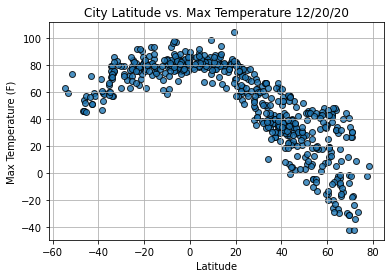

In [35]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

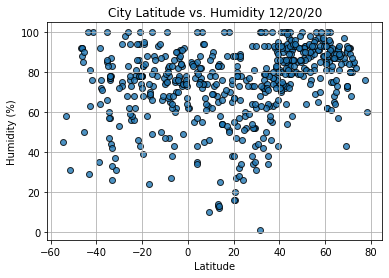

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

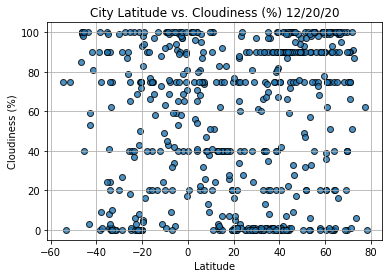

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

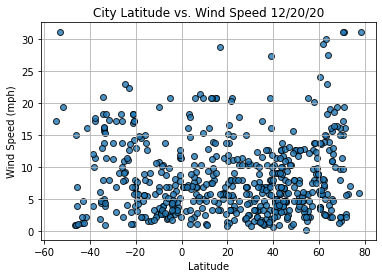

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [39]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [40]:
index13 = city_data_df.loc[13]
index13

City                       Tshela
Country                        CD
Date          2020-12-20 15:36:36
Lat                         -4.98
Lng                         12.93
Max Temp                    78.37
Humidity                       90
Cloudiness                     91
Wind Speed                   2.68
Name: 13, dtype: object

In [41]:
city_data_df['Lat'] >=0

0      False
1      False
2      False
3      False
4      False
       ...  
554     True
555    False
556     True
557     True
558     True
Name: Lat, Length: 559, dtype: bool

In [42]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
5,Coos Bay,US,2020-12-20 15:36:35,43.37,-124.22,55.99,100,90,12.75
6,Cedeno,CO,2020-12-20 15:36:35,7.05,-72.16,83.77,45,74,5.14
7,Pevek,RU,2020-12-20 15:36:35,69.70,170.31,-7.11,91,0,1.61
8,Maunabo,PR,2020-12-20 15:36:35,18.01,-65.90,82.00,100,7,5.01
9,Butaritari,KI,2020-12-20 15:36:35,3.07,172.79,80.58,84,56,18.39
...,...,...,...,...,...,...,...,...,...
553,Puerto Lopez,CO,2020-12-20 15:38:23,4.08,-72.96,86.14,57,41,8.97
554,Kenai,US,2020-12-20 15:38:23,60.55,-151.26,8.60,84,20,3.56
556,Mindelo,CV,2020-12-20 15:38:24,16.89,-24.98,77.00,53,40,28.86
557,Kamenka,RU,2020-12-20 15:38:25,51.32,42.77,14.00,90,47,7.56


In [43]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [45]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

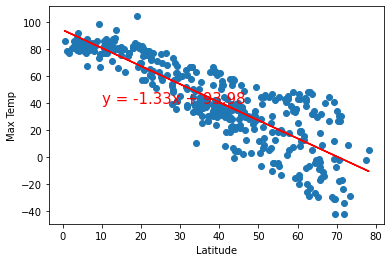

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

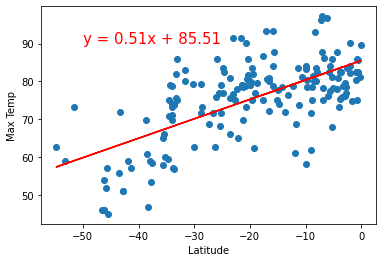

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

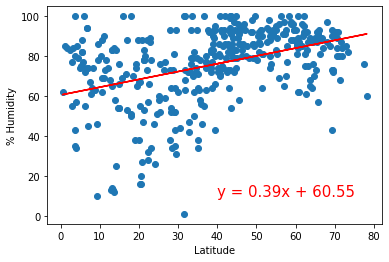

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

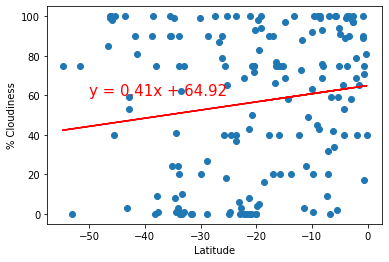

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

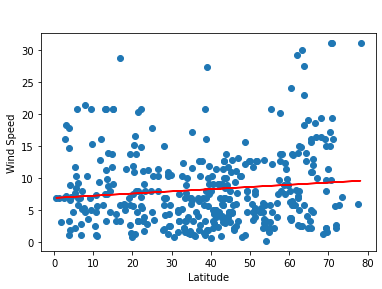

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

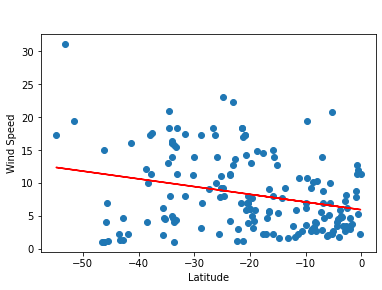

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))